In [1]:
import sys
sys.path += ["../"]

import smbh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pos = 1e-3 * np.ones(3) / 3 ** 0.5

v = 25
theta = np.pi / 4
phi = np.pi / 4

x = v * np.sin(theta) * np.cos(phi)
y = v * np.sin(theta) * np.sin(phi)
z = v * np.cos(theta)

speeds = [x, y, z]

pos_ = pos.copy()

dq = 1e-4

coeffs = [[1, 0, 0],
            [-1, 0, 0],
            [0, 1, 0],
            [0, -1, 0],
            [0, 0, 1],
            [0, 0, -1]]

coeffs = np.array(coeffs)

r = smbh.run(speeds, pos, pot_type = 1)
r.setDistance(1, 0.5, 0.25)

rvir = r.R_VIR

results = [r]

for d in coeffs:
    r = smbh.run(speeds, pos + d * dq, pot_type = 1)
    r.setDistance(1, 0.5, 0.25)
    results.append(r)

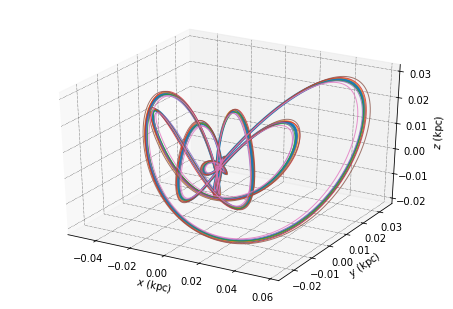

In [3]:
fig, ax = smbh.make3dPlot(results[0].positions, lw = 3)
for result in results[1:]:
    p = result.positions
    smbh.make3dPlot(p, (fig, ax), alpha = 0.8, lw = 1)

# fig.tight_layout()
fig.savefig('lyapunov_orbits.png', dpi = 300)

plt.show()

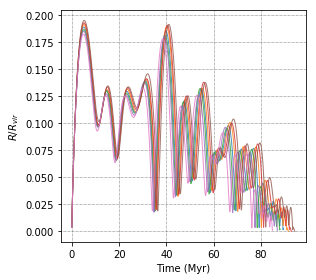

In [4]:
fig, ax = plt.subplots(figsize = (4.5, 4))
for result in results:
    ax.plot(result.times * 1000, result.distance / rvir, alpha = 0.8, lw = 1)

ax.grid()
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('$R/R_{vir}$')

fig.tight_layout()

fig.savefig('lyapunov_distances.png', dpi = 300)

plt.show()